In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [3]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [4]:
imp = IterativeImputer(max_iter=10, random_state=0)

Import data

In [6]:
data = pd.read_csv('train_data.csv', sep=",")

In [8]:
data

,Name,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,SBFG,4.520300e+07,0.0514,0.000000e+00,4.520300e+07,0.000000e+00,2.754700e+07,3.157800e+07,1.362500e+07,0.000000e+00,...,0.2051,0.0000,0.0000,0.0743,0.1008,-0.0729,0.0000,0.0096,Financial Services,0
1,FOMX,3.669000e+06,-0.3362,1.300000e+04,3.656000e+06,5.777900e+07,1.149100e+07,6.927000e+07,-6.561400e+07,0.000000e+00,...,0.0000,-0.6922,0.0000,-0.4083,-0.5446,-1.0000,1.2311,0.2462,Healthcare,0
2,VIA,1.326300e+10,NaN,7.436000e+09,5.827000e+09,NaN,3.005000e+09,3.228000e+09,2.599000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Cyclical,0
3,ABM,5.453600e+09,0.0600,4.881200e+09,5.724000e+08,0.000000e+00,4.366000e+08,4.706000e+08,1.018000e+08,1.920000e+07,...,0.0313,0.2917,0.0000,0.6731,0.3782,3.3914,0.0000,0.0646,Industrials,0
4,THS,6.307100e+09,0.0214,5.226700e+09,1.080400e+09,0.000000e+00,7.007000e+08,1.493200e+09,-4.128000e+08,1.268000e+08,...,0.0000,-0.2312,-0.0610,-0.1171,-0.1181,-0.0879,0.0000,-0.0592,Consumer Defensive,1
5,UUUU,3.104600e+07,-0.4309,2.271000e+07,8.336000e+06,0.000000e+00,1.492300e+07,3.422500e+07,-2.588900e+07,2.101000e+06,...,0.0000,2.4423,-0.0126,-0.0566,-0.1540,-0.0698,0.0000,-0.0384,Basic Materials,1
6,JMU,8.873655e+07,0.2122,8.818778e+07,5.487680e+05,0.000000e+00,2.190326e+07,1.689217e+08,-1.683729e+08,4.111640e+05,...,0.0000,0.7738,1.4031,-0.5032,-0.5837,0.0000,0.0000,-0.2160,Consumer Cyclical,0
7,CBH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financial Services,0
8,PUB,9.228200e+07,0.1040,0.000000e+00,9.228200e+07,0.000000e+00,4.339800e+07,5.595900e+07,3.632300e+07,0.000000e+00,...,0.0000,0.0000,0.0000,0.2746,0.1085,11.5039,0.0000,0.0946,Financial Services,1
9,CC,6.183000e+09,0.1450,4.438000e+09,1.745000e+09,8.100000e+07,6.260000e+08,7.640000e+08,9.810000e+08,2.140000e+08,...,0.0000,0.1388,0.2190,0.2035,7.4455,0.1603,0.0000,-0.3383,Basic Materials,0


In [13]:
data['Sector_fac'] = pd.factorize(data['Sector'])[0]

In [14]:
pd.factorize(data['Sector'])[0]

array([0, 1, 2, ..., 6, 3, 6])

In [15]:
sector_index = pd.factorize(data['Sector'])[1]

In [16]:
sector_dict = {k: v for v, k in enumerate(sector_index)}

Data frame with class equal to 0

In [17]:
data0 = data[data['Class'] == 0]

Data frame with class equal to 1

In [18]:
data1 = data[data['Class'] == 1]

Number of rows of data frame data0

In [19]:
data0.shape[0]

2498

Get random rows with number of rows same with data1

In [20]:
new_data0 = data0.sample(n = data1.shape[0], replace = True)

Number of rows of data frame data1

In [21]:
data1.shape[0]

961

In [22]:
new_data = pd.concat([new_data0, data1], axis = 0)

Get columns with only numeric data

In [23]:
new_data = new_data.drop('Sector', 1)
new_data2 = new_data.drop('Class', 1)

In [24]:
X = new_data2.values[:, 1:]
print(X)

[[46742000.0 0.0189 28764000.0 ... 0.0 -0.0116 2]
 [1290447748.0 0.0739 1053782105.0 ... -0.2324 0.331 2]
 [nan nan nan ... nan nan 0]
 ...
 [385961000.0 -0.0962 169382000.0 ... -0.1205 -0.08 7]
 [565153000.0 0.1783 321780000.0 ... 0.0 0.2147 5]
 [24137913.0 0.2086 6307800.0 ... -0.0536 0.2248 7]]


In [ ]:
X = imp.fit(X)

Make class value as integer

In [18]:
Y = new_data.values[:, -2].astype('int')

In [19]:
Y

array([0, 0, 0, ..., 1, 1, 1])

Split the data into x train, x test, y train, y test (20% testiing data, 80% training data)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [21]:
X_train

array([[2154655000.0, 0.0566, 2070301000.0, ..., -0.5055, 0.0582, 6],
       [256592000.0, 0.7152, 10482000.0, ..., 0.0, 1.1849, 10],
       [1329200000.0, 0.5287, 1261400000.0, ..., 0.0, 0.0033, 5],
       ...,
       [386000000.0, 1.1690731541340582, 3389895844.7649555, ...,
        0.4236339873861245, 0.941874790794978, 2],
       [68705000.0, 0.0718, 0.0, ..., 0.0, 0.0724, 0],
       [76000000.0, 1.1690731541340582, 52000000.0, ...,
        0.4236339873861245, 0.941874790794978, 7]], dtype=object)

Get decision tree model and fit the training data set

In [22]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 100,
                            max_depth=100, min_samples_leaf=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [23]:
dot_data = tree.export_graphviz(clf, out_file=None)

Get decision tree

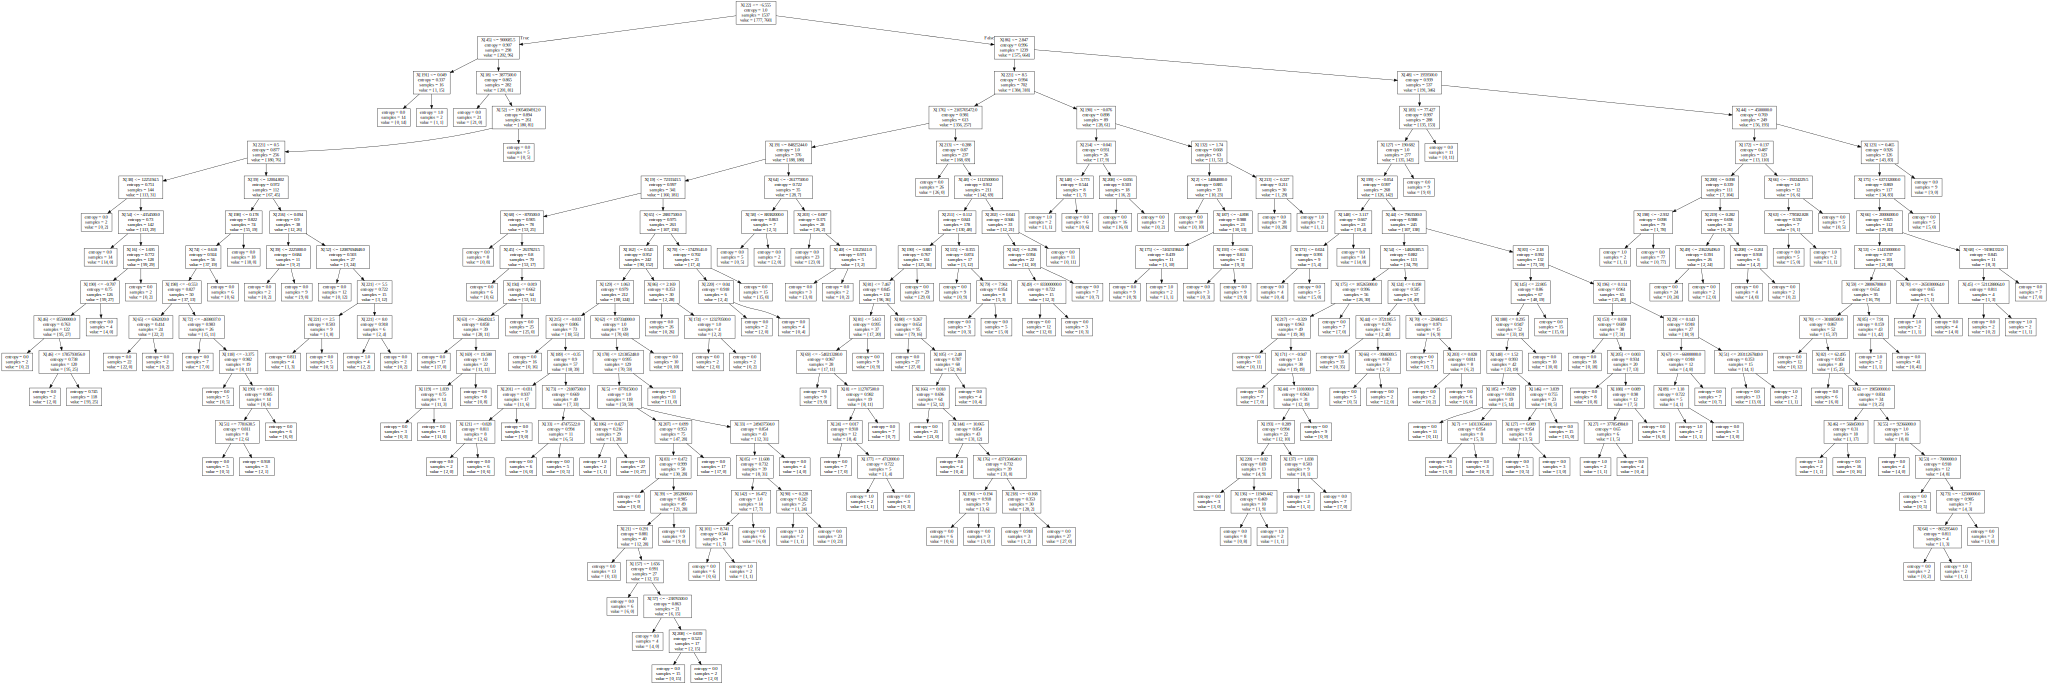

In [24]:
graph = graphviz.Source(dot_data)
graph

In [25]:
X_test

array([[6263100000.0, 0.0615, 2478700000.0, ..., 0.0, 0.0637, 0],
       [753200000.0, 0.055, 597400000.0, ..., 0.0, 0.2117, 3],
       [1024191000.0, 0.0184, 452286000.0, ..., -0.1941, 0.1261, 3],
       ...,
       [263479000.0, 0.4532, 49990000.0, ..., 0.316, 0.2927, 7],
       [5361782064.523937, 1.1690731541340582, 3389895844.7649555, ...,
        0.4236339873861245, 0.941874790794978, 0],
       [10551000000.0, 0.0671, 2995000000.0, ..., 0.0, 0.0609, 3]],
      dtype=object)

Get prediction with X_test

In [26]:
predicted_completion = clf.predict(X_test)

In [27]:
print(clf.predict(X_test))

[1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1
 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1
 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1
 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0]


In [28]:
print(y_test)

[1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1
 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1
 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1]


In [29]:
np.mean(predicted_completion == y_test)

0.5844155844155844

In [30]:
set(predicted_completion)

{0, 1}

In [31]:
print(metrics.classification_report(y_test, predicted_completion))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       184
           1       0.62      0.53      0.57       201

   micro avg       0.58      0.58      0.58       385
   macro avg       0.59      0.59      0.58       385
weighted avg       0.59      0.58      0.58       385



In [32]:
metrics.confusion_matrix(y_test, predicted_completion)

array([[119,  65],
       [ 95, 106]])

In [160]:
test_data = pd.read_csv('test_data.csv', sep=",")

In [161]:
test_data.columns

Index(['Name', 'Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       '5Y Dividend per Share Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector'],
      dtype='object', length=223)

In [162]:
new_test_data = test_data

In [163]:
new_test_data

,Name,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector
0,VIPS,1.102060e+10,0.3525,8.557810e+09,2.462794e+09,2.733452e+08,8.201852e+08,2.056136e+09,4.066575e+08,1.245995e+07,...,NaN,0.0000,0.9219,0.4764,0.5889,1.5821,0.3805,0.2141,0.1920,Consumer Defensive
1,WMT,4.858730e+11,0.0078,3.612560e+11,1.246170e+11,0.000000e+00,1.018530e+11,1.018530e+11,2.276400e+10,2.367000e+09,...,0.0650,0.0208,0.0375,-0.0320,-0.0038,-0.0011,-0.0819,0.0000,0.0496,Consumer Defensive
2,MDLZ,2.589600e+10,-0.0010,1.586200e+10,1.003400e+10,0.000000e+00,5.938000e+09,6.758000e+09,3.276000e+09,3.820000e+08,...,-0.4459,0.1224,0.0161,0.0356,0.0231,0.0676,0.0263,0.0000,-0.0929,Consumer Defensive
3,MO,2.557600e+10,-0.0065,1.361300e+10,1.196300e+10,0.000000e+00,2.338000e+09,2.370000e+09,9.593000e+09,7.050000e+08,...,0.0836,0.0829,-0.0596,0.0848,-0.0594,0.2306,0.0009,0.0000,-0.1217,Consumer Defensive
4,TAL,1.043100e+09,0.6826,5.223270e+08,5.207730e+08,0.000000e+00,3.892920e+08,3.861790e+08,1.345940e+08,1.314500e+07,...,0.0000,-0.2461,-0.1303,3.7016,0.7231,0.4516,0.9758,0.0000,0.6595,Consumer Defensive
5,NWL,9.552000e+09,0.0404,6.289000e+09,3.263000e+09,0.000000e+00,2.705600e+09,2.877500e+09,3.855000e+08,4.691000e+08,...,0.1540,0.1006,-0.3158,-0.2144,-0.0207,0.0788,-0.1128,0.0000,0.0364,Consumer Defensive
6,TGT,7.027100e+10,-0.0476,4.914500e+10,2.112600e+10,0.000000e+00,1.421700e+10,1.626200e+10,4.864000e+09,9.910000e+08,...,0.1610,0.1366,0.0000,-0.0339,-0.0703,-0.0813,-0.0009,0.0000,-0.0305,Consumer Defensive
7,HRL,9.167519e+09,-0.0374,7.164356e+09,2.003163e+09,0.000000e+00,7.621040e+08,7.622840e+08,1.240879e+09,1.268300e+07,...,0.1778,0.1935,0.0457,-0.0656,0.0951,0.1116,0.0000,0.0000,-0.1260,Consumer Defensive
8,PEP,6.352500e+10,0.0116,2.879600e+10,3.472900e+10,0.000000e+00,2.445300e+10,2.445300e+10,1.027600e+10,1.151000e+09,...,0.0829,0.0773,0.0493,0.0823,0.0859,-0.0082,0.0632,0.0000,-0.0129,Consumer Defensive
9,COTY,7.650300e+09,0.7591,3.028300e+09,4.622000e+09,0.000000e+00,4.040700e+09,5.042900e+09,-4.209000e+08,2.186000e+08,...,0.0000,0.4812,1.1530,0.8604,2.2049,12.8936,0.7416,0.0000,0.9927,Consumer Defensive


In [164]:
new_test_data.replace(sector_dict, inplace = True)

In [165]:
new_test_data = new_test_data.fillna(test_data.mean())

In [166]:
new_test_data = new_test_data.values[:, 1:]

In [167]:
predicted_completion2 = clf.predict(new_test_data)

In [168]:
print(predicted_completion2)

[0 0 0 ... 1 1 1]


In [169]:
test_data_name = test_data['Name'].values

In [170]:
submission = pd.DataFrame(list(zip(test_data_name, predicted_completion2)), columns = ['Name', 'Class'])

In [171]:
submission[['Name', 'Class']]

,Name,Class
0,VIPS,0
1,WMT,0
2,MDLZ,0
3,MO,0
4,TAL,0
5,NWL,0
6,TGT,0
7,HRL,1
8,PEP,0
9,COTY,0


In [173]:
submission.to_csv('ds310_submission2.csv')